<a href="https://colab.research.google.com/github/delfibarros-lab/ds-portfolio-eda-titanic/blob/main/EDA_Titanic_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importamos las herramientas clave para manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para que los gráficos se vean profesionales
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Ocultar advertencias molestas

In [3]:
# Usamos un link crudo de GitHub que contiene el dataset clásico del Titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Vemos las primeras 5 filas para entender qué tenemos
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("--- Valores Nulos antes de la limpieza ---")
print(df.isnull().sum())

# 1. Rellenamos la 'Edad' faltante con la mediana (es más robusto que el promedio frente a outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. La columna 'Cabin' tiene demasiados nulos, no aporta valor general, la eliminamos
df.drop(columns=['Cabin'], inplace=True)

# 3. 'Embarked' tiene solo 2 nulos, los rellenamos con el puerto más común (moda)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\n--- Valores Nulos después de la limpieza ---")
print(df.isnull().sum())

--- Valores Nulos antes de la limpieza ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Valores Nulos después de la limpieza ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


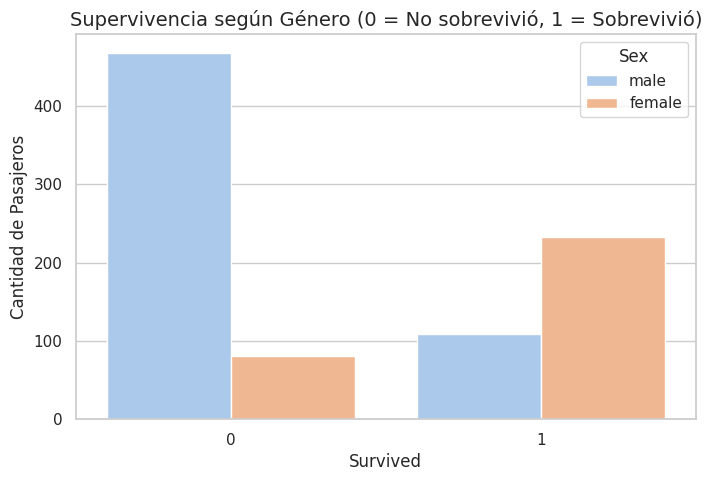

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')
plt.title('Supervivencia según Género (0 = No sobrevivió, 1 = Sobrevivió)', fontsize=14)
plt.ylabel('Cantidad de Pasajeros')
plt.show()

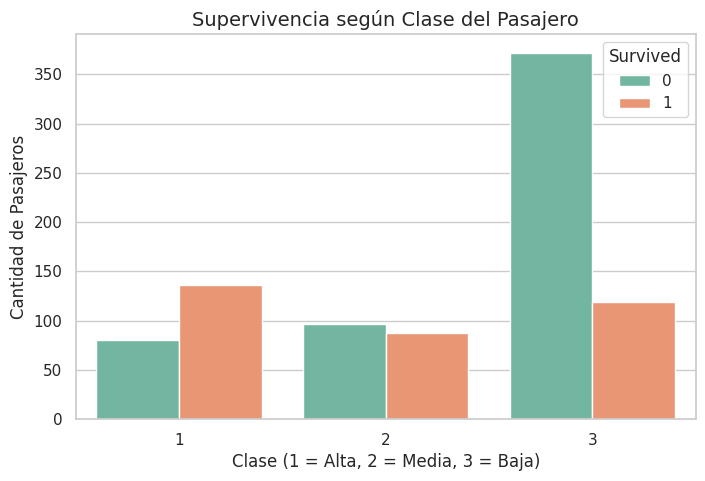

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Supervivencia según Clase del Pasajero', fontsize=14)
plt.xlabel('Clase (1 = Alta, 2 = Media, 3 = Baja)')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

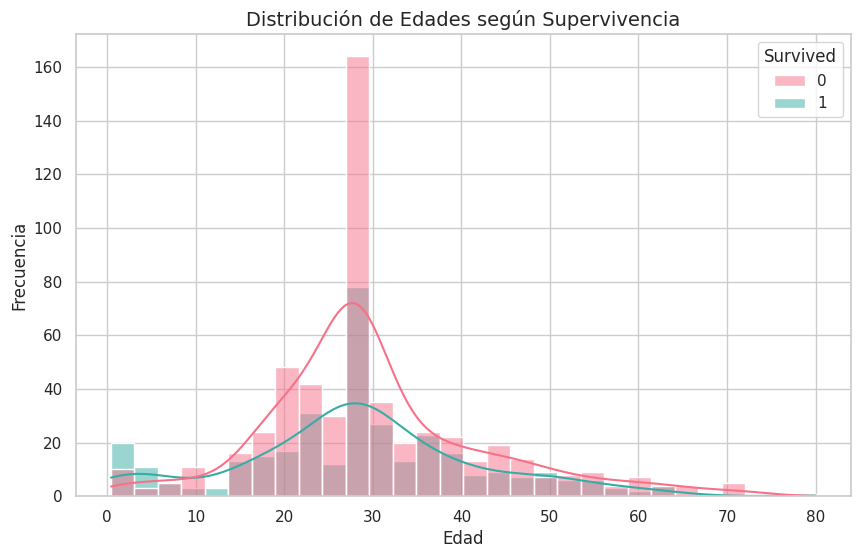

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette='husl')
plt.title('Distribución de Edades según Supervivencia', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

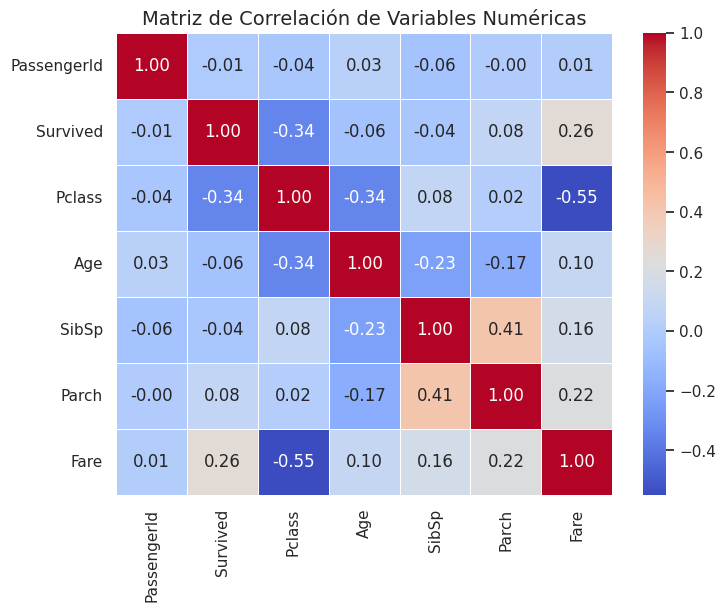

In [8]:
plt.figure(figsize=(8, 6))
# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Calculamos correlación
correlation_matrix = numeric_df.corr()

# Graficamos un Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.show()